In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# % matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape

(1460, 81)

There are total <b>1460 smaples</b> which we can use to train and <b>80 features</b> and <b>1 target variable</b>

In [5]:
test.shape
#1 column less because target variable isn't there in test set!

(1459, 80)

### Variable Identification
info method provides information about dataset like <br>
total values in each column, null/not null, datatype, memory occupied etc

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
# How many columns with different datatypes
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

### Correlation Data

In [8]:
corr = train.corr()['SalePrice']

In [9]:
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### Inference
<i>OverallQual ,GrLivArea ,GarageCars,GarageArea ,TotalBsmtSF, 1stFlrSF ,FullBath,TotRmsAbvGrd,YearBuilt, YearRemodAdd</i> have more than <i><b>0.5 correlation</b></i> with <i><b>SalePrice</b></i>. <i>EnclosedPorch and KitchenAbvGr</i> have little negative correlation with target variable.<br>
These can prove to be important features to predict SalePrice.

Text(0.5, 1.0, 'Correlation coefficients w.r.t Sale Price')

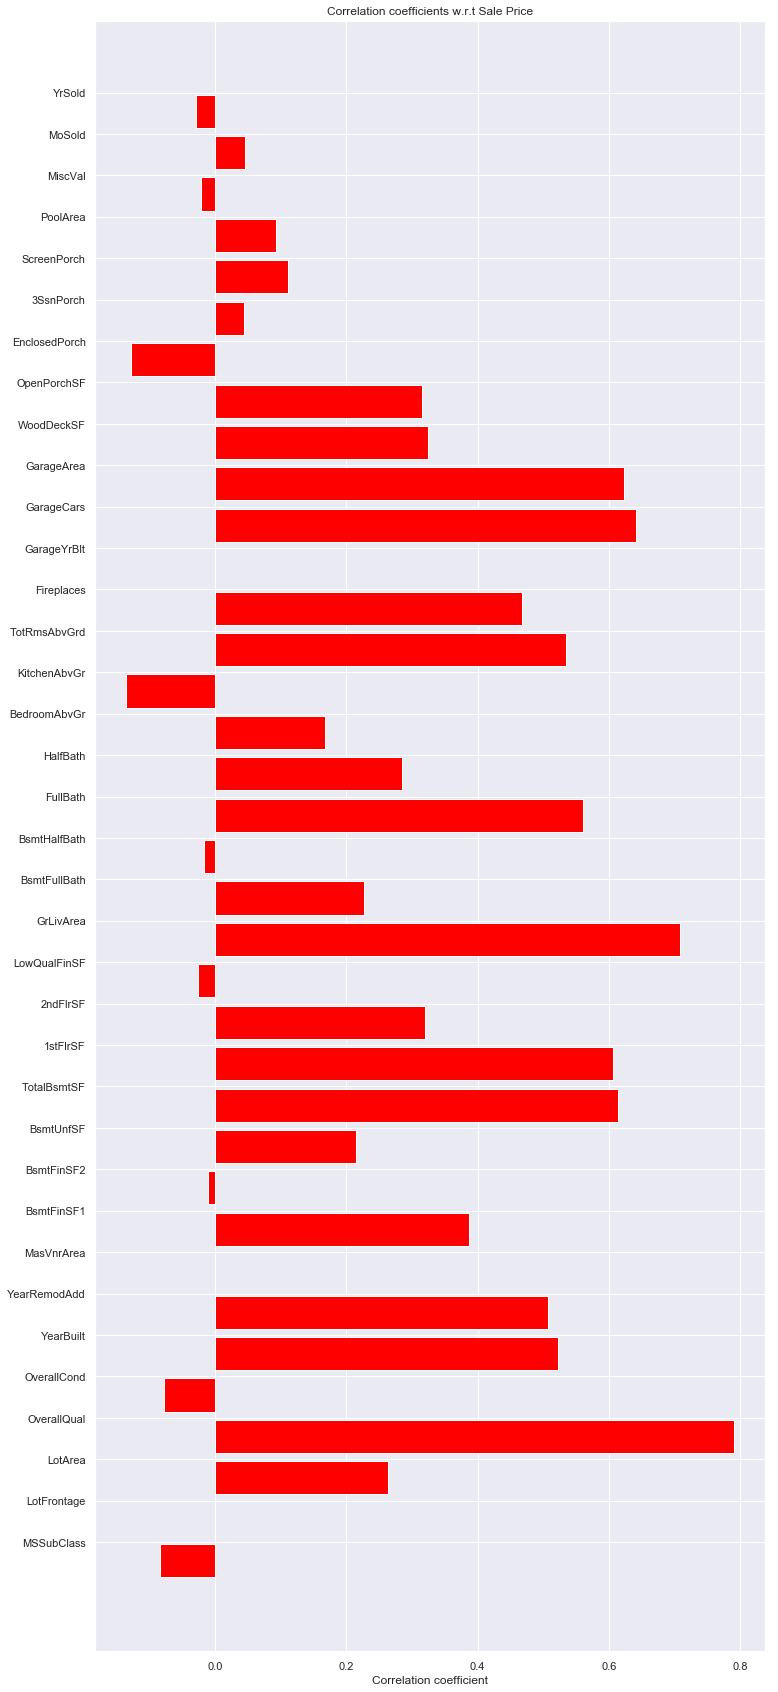

In [10]:
# Plotting correlation
num_feat = train.columns[train.dtypes!=object]
num_feat= num_feat[1:-1]
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train[col].values, train.SalePrice.values)[0,1])

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,30))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficients w.r.t Sale Price")

In [16]:
correlations = train.corr()
attrs = correlations.iloc[:-1, :-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]).unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(list(set([(tuple(sorted(key)), important_corrs[key]) 
                                               for key in important_corrs])),
                                     columns = ['Attribute Pairs', 'Correlation'])
                                     
# Sorted by absolute value

unique_important_corrs = unique_important_corrs.ix[abs(unique_important_corrs['Correlation']).argsort()[::-1]]
unique_important_corrs

,Attribute Pairs,Correlation
23,"(GarageArea, GarageCars)",0.882475
4,"(GarageYrBlt, YearBuilt)",0.825667
18,"(GrLivArea, TotRmsAbvGrd)",0.825489
10,"(1stFlrSF, TotalBsmtSF)",0.819530
21,"(2ndFlrSF, GrLivArea)",0.687501
9,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
27,"(BsmtFinSF1, BsmtFullBath)",0.649212
16,"(GarageYrBlt, YearRemodAdd)",0.642277
25,"(FullBath, GrLivArea)",0.630012
3,"(2ndFlrSF, TotRmsAbvGrd)",0.616423


In [17]:
multi_collinear_cols = []
for x in unique_important_corrs["Attribute Pairs"]:
    for col in x:
        if x in multi_collinear_cols:
            continue
        else:
            multi_collinear_cols.append(col)
multi_collinear_cols = list(set(multi_collinear_cols))
print(len(multi_collinear_cols))
multi_collinear_cols

16


['FullBath',
 'BsmtFinSF1',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFullBath',
 'OverallQual',
 '1stFlrSF',
 'GarageCars',
 'GarageYrBlt',
 'HalfBath',
 'GarageArea',
 'GrLivArea',
 'TotalBsmtSF',
 '2ndFlrSF']

This shows multicollinearity. In regression, "multicollinearity" refers to features that are correlated with other features. Multicollinearity occurs when your model includes multiple factors that are correlated not just to your target variable, but also to each other.

### HeatMap

Text(0.5, 1.0, 'Correlation between features')

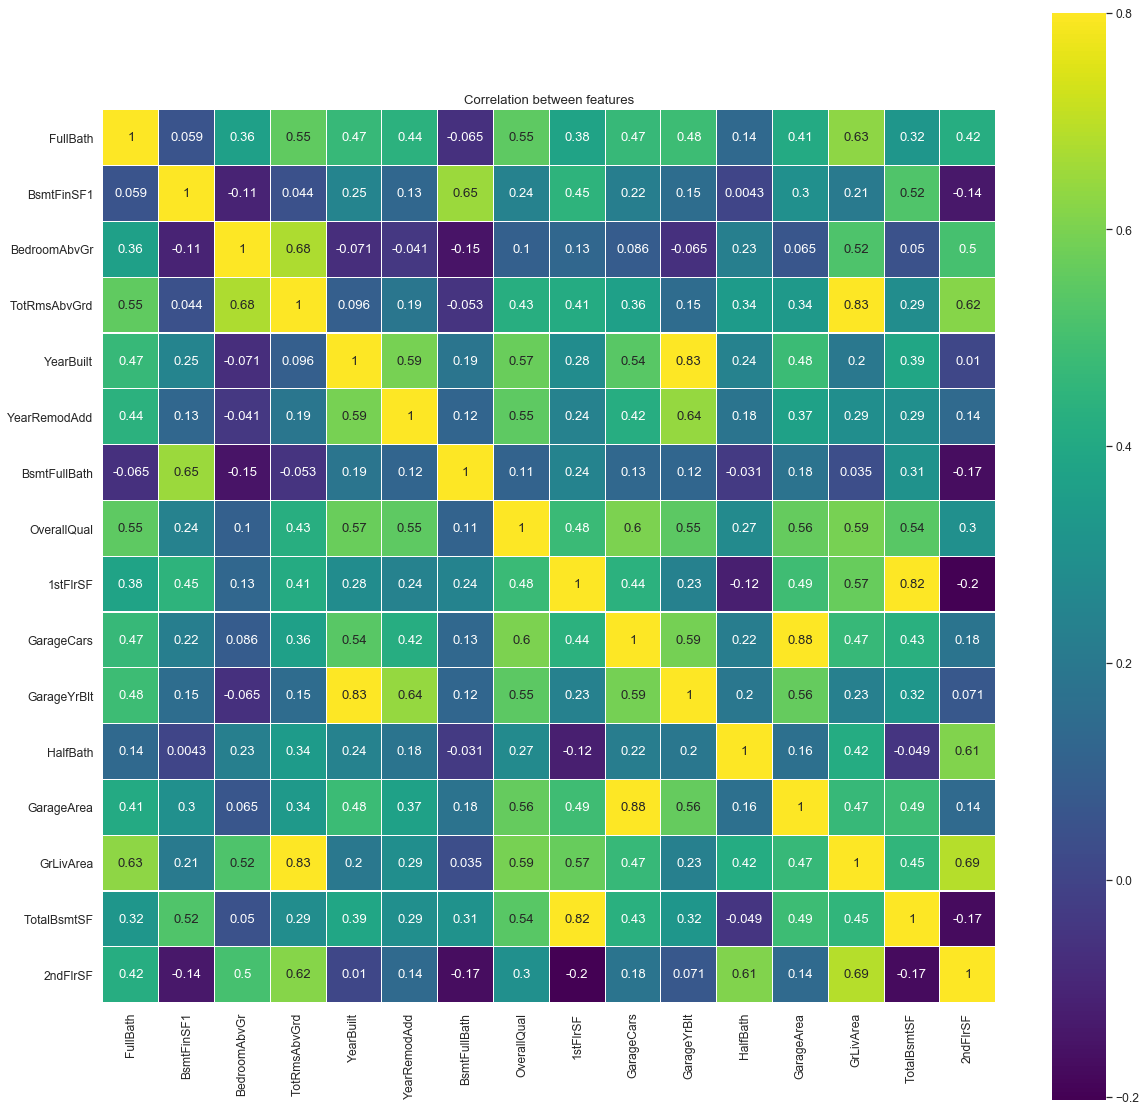

In [18]:
corrMatrix = train[multi_collinear_cols].corr()

sns.set(font_scale = 1.10)
plt.figure(figsize=(20, 20))

sns.heatmap(corrMatrix, vmax=.8, linewidths = 0.01,
           square=True, annot=True, cmap='viridis', linecolor="white")
plt.title('Correlation between features')

As we saw above there are few feature which shows high multicollinearity from heatmap. Lets focus on yellow squares on diagonal line and few on the sides.<br>
<br>
GarageCars and GarageArea<br><br>
TotalBsmtSF and 1stFlrSF<br><br>
GarageYrBlt and YearBuilt<br><br>
TotRmsAbvGrd and GrLivArea<br><br>
SalePrice and OverallQual<br><br>
We have to create a single feature from them before we use them as predictors.

In [19]:
train[['OverallQual', 'SalePrice']]

,OverallQual,SalePrice
0,7,208500
1,6,181500
2,7,223500
3,7,140000
4,8,250000
...,...,...
1455,6,175000
1456,6,210000
1457,7,266500
1458,5,142125


### Visualizing a target variables

Text(0, 0.5, 'Sale Price')

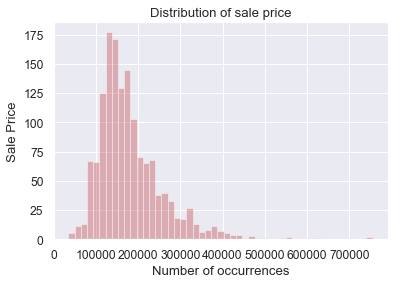

In [20]:
sns.distplot(train['SalePrice'], color="r", kde=False)
plt.title("Distribution of sale price")
plt.xlabel("Sale Price")
plt.ylabel("Number of occurrences")

In [21]:
# There are some outliers lets remove them 
upperlimit = np.percentile(train.SalePrice.values, 99.5)

In [22]:
train['SalePrice'].ix[train['SalePrice']>upperlimit] = upperlimit

Text(0, 0.5, 'Sale price')

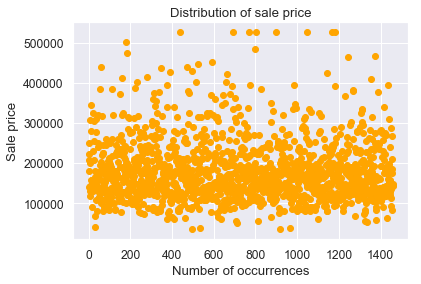

In [23]:
plt.scatter(range(train.shape[0]), train.SalePrice.values, color='orange')
plt.title("Distribution of sale price")
plt.xlabel("Number of occurrences")
plt.ylabel("Sale price")

In [24]:
# lets see if there are any columns with missing values 
null_columns = train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Text(0.5, 1.0, 'Variables with missing values')

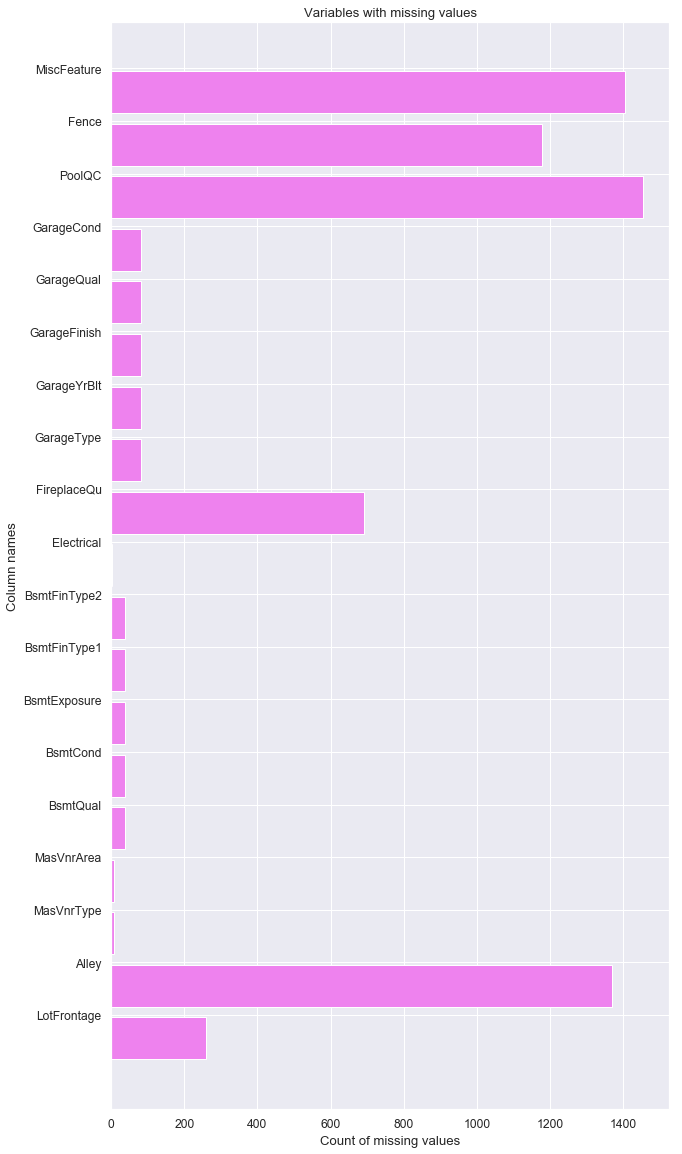

In [25]:
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(train[col].isnull().sum())
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(10,20))
rects = ax.barh(ind, np.array(values), color='violet')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column names")
ax.set_title("Variables with missing values")

### Multivariate Analysis
When we understand how 3 or more variables behave accordingly to each other  

In [26]:
train['LotFrontage'].corr(train['LotArea'])

0.42609501877180805

In [27]:
train['SqrtLotArea'] = np.sqrt(train['LotArea'])
train['LotFrontage'].corr(train['SqrtLotArea'])

0.6020022167939363

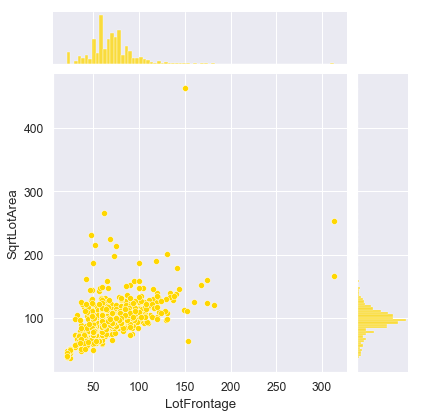

In [28]:
sns.jointplot(train['LotFrontage'], train['SqrtLotArea'], color='gold');

In [34]:
print("Null values in LotFrontage: ", train['LotFrontage'].isnull().sum())
print("Null values in LotArea: ", train['LotArea'].isnull().sum())

Null values in LotFrontage:  0
Null values in LotArea:  0


In [29]:
filter = train['LotFrontage'].isnull()
train.LotFrontage[filter] = train.SqrtLotArea[filter]

### MasVnrType and MasVnrArea

Text(0.5, 0, 'Mas Vnr Area in sq feet')

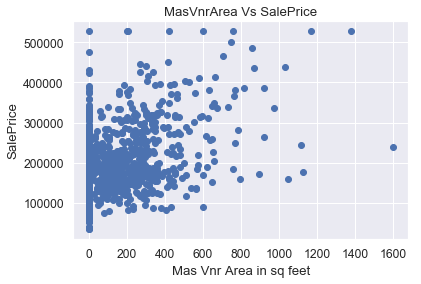

In [30]:
plt.scatter(train['MasVnrArea'], train['SalePrice'])
plt.title("MasVnrArea Vs SalePrice")
plt.ylabel("SalePrice")
plt.xlabel("Mas Vnr Area in sq feet")

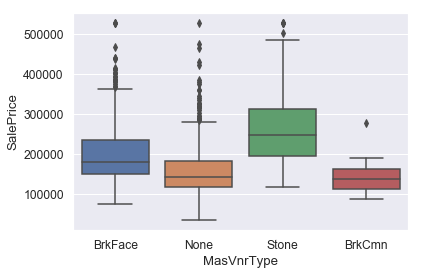

In [35]:
sns.boxplot("MasVnrType", "SalePrice", data=train)

In [36]:
train['MasVnrType'] = train["MasVnrType"].fillna('None')
train["MasVnrArea"] = train["MasVnrArea"].fillna(0.0)

### Bivariate Analysis


#### Electrical
Electrical system<br><br>
<b>SBrkr</b>	Standard Circuit Breakers & Romex<br>
<b>FuseA</b>	Fuse Box over 60 AMP and all Romex wiring (Average)<br>	
<b>FuseF</b>	60 AMP Fuse Box and mostly Romex wiring (Fair)<br>
<b>FuseP</b>	60 AMP Fuse Box and mostly knob & tube wiring (poor)<br>
<b>Mix</b>	    Mixed<br> 

Text(0.5, 0, 'Electrica')

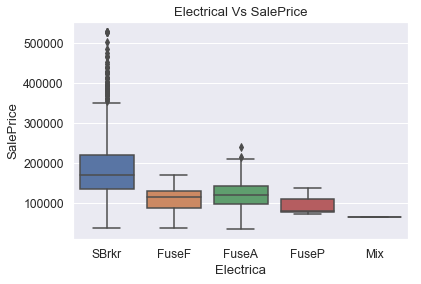

In [37]:
sns.boxplot('Electrical', 'SalePrice', data=train)
plt.title('Electrical Vs SalePrice')
plt.ylabel('SalePrice')
plt.xlabel('Electrical')

In [43]:
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [44]:
train['Electrical'] = train['Electrical'].fillna('SBrkr')

### Alley
Type of alley access to property<br>
<b>Grvl</b>	Gravel<br>
<b>Pave</b>	Paved<br>
<b>NA</b> 	No alley access<br>

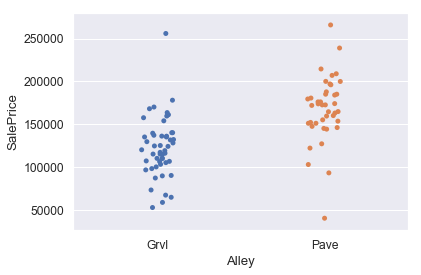

In [55]:
sns.stripplot(x=train['Alley'], y=train['SalePrice'], jitter=True)
plt.show()

In [57]:
train['Alley'] = train['Alley'].fillna('None')

In [58]:
train['Alley'].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

### Basement Features 
<b>TotalBsmtSF</b>: Total square feet of basement area

Text(0.5, 0, 'Total Basement area in Square Feet')

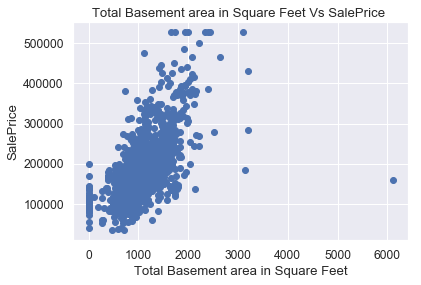

In [60]:
plt.scatter(train["TotalBsmtSF"],train["SalePrice"])
plt.title("Total Basement area in Square Feet Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement area in Square Feet")

In [63]:
# There are few outlier in total basement area. Remove those outliers 
upperlimit = np.percentile(train.TotalBsmtSF.values, 99.5)

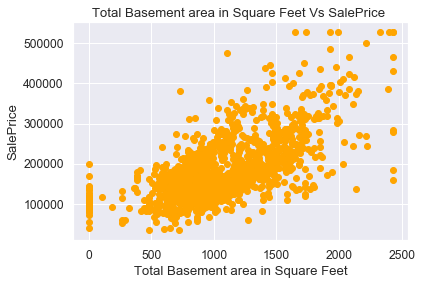

In [65]:
train['TotalBsmtSF'].ix[train['TotalBsmtSF']>upperlimit] = upperlimit

plt.scatter(train["TotalBsmtSF"],train["SalePrice"], color='orange')
plt.title("Total Basement area in Square Feet Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement area in Square Feet")
plt.show()

In [69]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
print(len(train[basement_cols][train['BsmtQual'].isnull()==True]))
train[basement_cols][train['BsmtQual'].isnull()==True]

37


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0


In [71]:
for col in basement_cols:
    if 'FinSF'not in col:
        train[col] = train[col].fillna('None')

## Fireplaces

### Fireplaces
Number of fireplaces
### FireplaceQu
Fireplace quality

<b>Ex</b>	Excellent - Exceptional Masonry Fireplace<br>
<b>Gd</b>	Good - Masonry Fireplace in main level<br>
<b>TA</b>	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement<br>
<b>Fa</b>	Fair - Prefabricated Fireplace in basement<br>
<b>Po</b>	Poor - Ben Franklin Stove<br>
<b>NA</b>	No Fireplace<br>

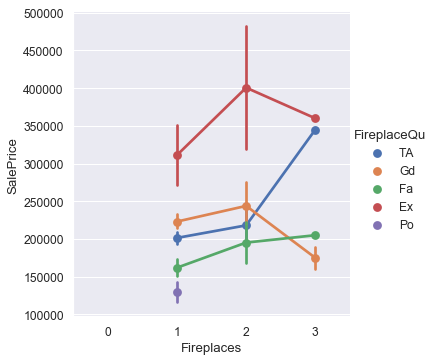

In [74]:
sns.factorplot("Fireplaces", "SalePrice", data=train, hue='FireplaceQu')
plt.show()

In [75]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [76]:
pd.crosstab(train['Fireplaces'], train['FireplaceQu'])

FireplaceQu,Ex,Fa,Gd,None,Po,TA
Fireplaces,,,,,,
0,0,0,0,690,0,0
1,19,28,324,0,20,259
2,4,4,54,0,0,53
3,1,1,2,0,0,1


### Garages
<b>GarageArea</b>: Size of garage in square feet

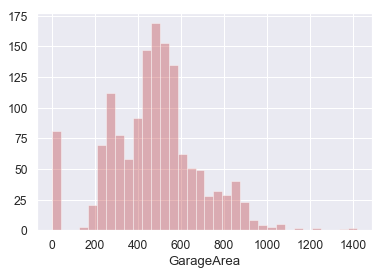

In [78]:
sns.distplot(train['GarageArea'], color='r', kde=False)
plt.show()

In [79]:
#GarageArea has got some outliers let remove those
upperlimit = np.percentile(train.GarageArea.values, 99.5)
train['GarageArea'].ix[train['GarageArea']>upperlimit] = upperlimit

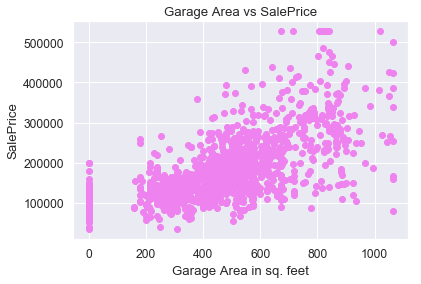

In [81]:
plt.scatter(train['GarageArea'].values, train['SalePrice'].values, color='violet')
plt.title('Garage Area vs SalePrice')
plt.ylabel('SalePrice')
plt.xlabel('Garage Area in sq. feet')
plt.show()

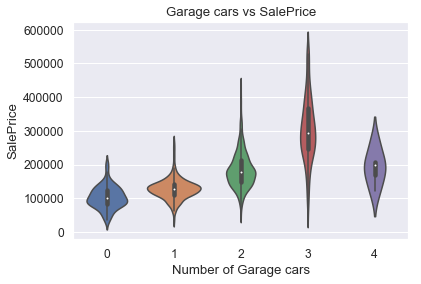

In [82]:
sns.violinplot(train['GarageCars'], train['SalePrice'])
plt.title('Garage cars vs SalePrice')
plt.xlabel('Number of Garage cars')
plt.ylabel('SalePrice')
plt.show()

In [84]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
train[garage_cols][train['GarageType'].isnull()==True]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0.0
48,NaN,NaN,NaN,NaN,NaN,0,0.0
78,NaN,NaN,NaN,NaN,NaN,0,0.0
88,NaN,NaN,NaN,NaN,NaN,0,0.0
89,NaN,NaN,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN,0,0.0
1407,NaN,NaN,NaN,NaN,NaN,0,0.0
1449,NaN,NaN,NaN,NaN,NaN,0,0.0
1450,NaN,NaN,NaN,NaN,NaN,0,0.0


In [85]:
for col in garage_cols:
    if train[col].dtype==np.object:
        train[col] = train[col].fillna('None')
    else:
        train[col] = train[col].fillna(0)

## Pool

### PoolArea 
Pool area in square feet

### PoolQC
Pool quality
		
<b>Ex</b>	Excellent<br>
<b>Gd</b>	Good<br>
<b>TA</b>	Average/Typical<br>
<b>Fa</b>	Fair<br>
<b>NA</b>	No Pool<br>
		

In [88]:
train['PoolQC'] = train['PoolQC'].fillna('None')

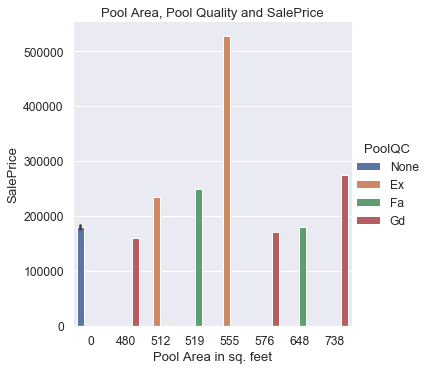

In [89]:
sns.factorplot("PoolArea","SalePrice", data=train, hue="PoolQC", kind='bar')
plt.title("Pool Area, Pool Quality and SalePrice")
plt.xlabel("Pool Area in sq. feet")
plt.ylabel("SalePrice")
plt.show()

### Fence

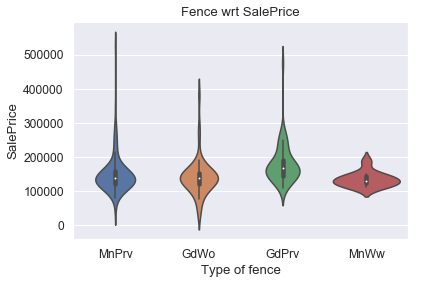

In [91]:
sns.violinplot(train["Fence"], train["SalePrice"])
plt.title("Fence wrt SalePrice")
plt.ylabel("SalePrice")
plt.xlabel("Type of fence")
plt.show()

In [92]:
train.Fence.isnull().sum()

1179

Fence has got 1179 null values. We can safely assume that those houses doesn't have a Fence and replace those values with None.

In [93]:
train['Fence'] = train['Fence'].fillna('None')

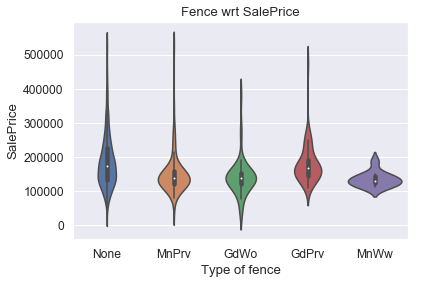

In [94]:
sns.violinplot(train["Fence"], train["SalePrice"])
plt.title("Fence wrt SalePrice")
plt.ylabel("SalePrice")
plt.xlabel("Type of fence")
plt.show()

### MiscFeature 
Miscellaneous feature not covered in other categories
		
<b>Elev</b>	Elevator<br>
<b>Gar2</b>	2nd Garage (if not described in garage section)<br>
<b>Othr</b>	Other<br>
<b>Shed</b>	Shed (over 100 SF)<br>
<b>TenC</b>	Tennis Court<br>
<b>NA</b>	None<br>

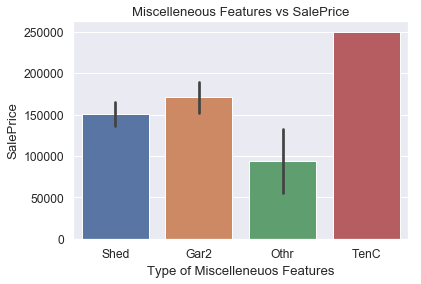

In [95]:
sns.barplot(train['MiscFeature'], train['SalePrice'])
plt.title("Miscelleneous Features vs SalePrice")
plt.ylabel("SalePrice")
plt.xlabel("Type of Miscelleneuos Features")
plt.show()

In [97]:
print("Null Values:", train['MiscFeature'].isnull().sum())
train['MiscFeature'].value_counts()

Null Values: 1406


Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [99]:
#Some houses don't have miscellaneous features like shed, Tennis court etc..
train["MiscFeature"] = train["MiscFeature"].fillna('None')

In [101]:
#Let's confirm that we have removed all missing values
train[null_columns].isnull().sum()

LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64